In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
# %run city_EDA.ipynb

In [2]:
#load the datasets
cab_data = pd.read_csv('./DataSets/Cab_Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './DataSets/Cab_Data.csv'

In [ ]:
#Investigate cab_data dataset
cab_data.head(10)

In [3]:
# Convert 'Date of Travel' to the right format
def convert_date(n):
    start_date = datetime(1899, 12, 30)
    current_date = start_date + timedelta(days = int(n))
    
    return current_date

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: convert_date(x))

NameError: name 'cab_data' is not defined

In [6]:
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [7]:
cab_data.shape

(359392, 7)

In [8]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [9]:
cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [10]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [11]:
cab_data.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [12]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [13]:
cab_data['City'].unique() 

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

---
### First: Over the span of nearly three years: what is the number of rides of yellow cab and pink cab companies

In [14]:
# number of cab drives of yellow vs pink cab
cab_data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [1]:
# Number of pink cab rides to yellow cab rides visualized.
# plt.figure(figsize=(12, 6))
cab_data['Company'].value_counts().plot(kind='bar', color=['Yellow', 'Pink']);
plt.title(";dfknbd")

NameError: name 'cab_data' is not defined

---
#### So as observed, number of yellow cab drives in the span of nearly three years is nearly 3 times more that pink cab drives
### Now: In the span of the same time, what is the profit comparison between the two companies.

In [16]:
# Average price grouped by cab company
cab_data_grouped = cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Company']].groupby('Company').sum()

In [17]:
cab_data_grouped

,KM Travelled,Price Charged,Cost of Trip
Company,,,
Pink Cab,1911073.11,2.632825e+07,2.102092e+07
Yellow Cab,6199417.47,1.258539e+08,8.183351e+07


In [18]:
# Revenue difference between yellow cab company and pink cab company
cab_data_grouped.iloc[1]['Price Charged'] - cab_data_grouped.iloc[0]['Price Charged']  

99525635.86000037

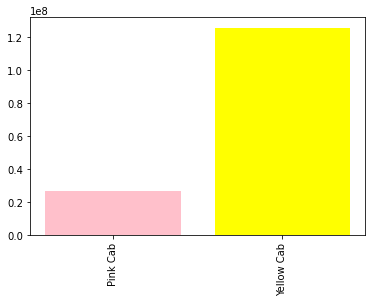

In [49]:
# difference in revenue visualized
# plt.figure(figsize=(14, 7))
plt.bar(data=cab_data_grouped, x='Company', height='Price Charged', color=['Pink', 'Yellow'])
plt.xticks(rotation = 90) 
plt.show();

In [22]:
cab_data_grouped.reset_index(inplace=True)

#### So as observed: Yellow Cab Company made nearly 100 million dollars in revenue more than Pink Cab Company over the span of three years
---

#### Now: lets see the performance year wise: 2016, 2017 and 2018

In [46]:
# Group the data by each company and year
cab_data.groupby(['Company', cab_data['Date of Travel'].dt.year]).sum()

Transaction ID  KM Travelled  Price Charged  \
Company    Date of Travel                                                
Pink Cab   2016              252535636696     563509.67   7.908479e+06   
           2017              309686779295     685823.52   9.578630e+06   
           2018              303857614588     661739.92   8.841143e+06   
Yellow Cab 2016              827819816122    1859978.21   3.848113e+07   
           2017             1002496699291    2214879.02   4.581891e+07   
           2018              976863257938    2124560.24   4.155384e+07   

                           Cost of Trip  
Company    Date of Travel                
Pink Cab   2016            6.194968e+06  
           2017            7.544975e+06  
           2018            7.280980e+06  
Yellow Cab 2016            2.455414e+07  
           2017            2.924293e+07  
           2018            2.803644e+07